In [1]:
! pip install kaggle
from google.colab import drive
drive.mount('/content/drive')
! mkdir ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json

Mounted at /content/drive


In [2]:
!kaggle datasets download -d budincsevity/szeged-weather

 90% 2.00M/2.23M [00:00<00:00, 2.94MB/s]
100% 2.23M/2.23M [00:00<00:00, 2.81MB/s]


In [3]:
!unzip -q /content/szeged-weather.zip -d /content/

In [4]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

In [5]:
import warnings

# Disable all warnings
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv('weatherHistory.csv')
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [7]:
feat_name = df.columns
print(f'The Features in the dataset are\n{feat_name}')
for feat in feat_name:

    t = type(df[feat][0])
    print(f'Type of feature {feat} is {t}')

The Features in the dataset are
Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')
Type of feature Formatted Date is <class 'str'>
Type of feature Summary is <class 'str'>
Type of feature Precip Type is <class 'str'>
Type of feature Temperature (C) is <class 'numpy.float64'>
Type of feature Apparent Temperature (C) is <class 'numpy.float64'>
Type of feature Humidity is <class 'numpy.float64'>
Type of feature Wind Speed (km/h) is <class 'numpy.float64'>
Type of feature Wind Bearing (degrees) is <class 'numpy.float64'>
Type of feature Visibility (km) is <class 'numpy.float64'>
Type of feature Loud Cover is <class 'numpy.float64'>
Type of feature Pressure (millibars) is <class 'numpy.float64'>
Type of feature Daily Summary is <class 'str'>


In [8]:
df1 = df[~ df['Precip Type'].apply(lambda x: isinstance(x, float))]

In [9]:
df2 = df.drop(['Formatted Date','Daily Summary','Daily Summary','Precip Type', 'Summary','Loud Cover'], axis=1, inplace=False)
df3 = df[['Formatted Date','Daily Summary','Daily Summary','Precip Type', 'Summary']]

## 3-1: Heatmap and histogram


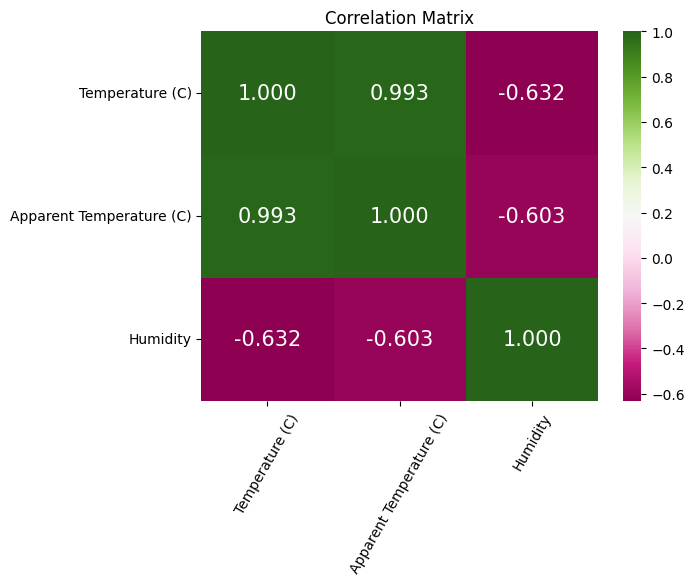

In [ ]:
# Draw Heatmap
# plt.figure(figsize=(8, 6))
sns.heatmap(df2[[ 'Temperature (C)', 'Apparent Temperature (C)', 'Humidity']].corr(),
            annot=True, annot_kws={"fontsize":15}, cmap="PiYG", fmt='.3f')
plt.title('Correlation Matrix')
plt.xticks(rotation=60)
plt.show()



<Figure size 640x480 with 0 Axes>

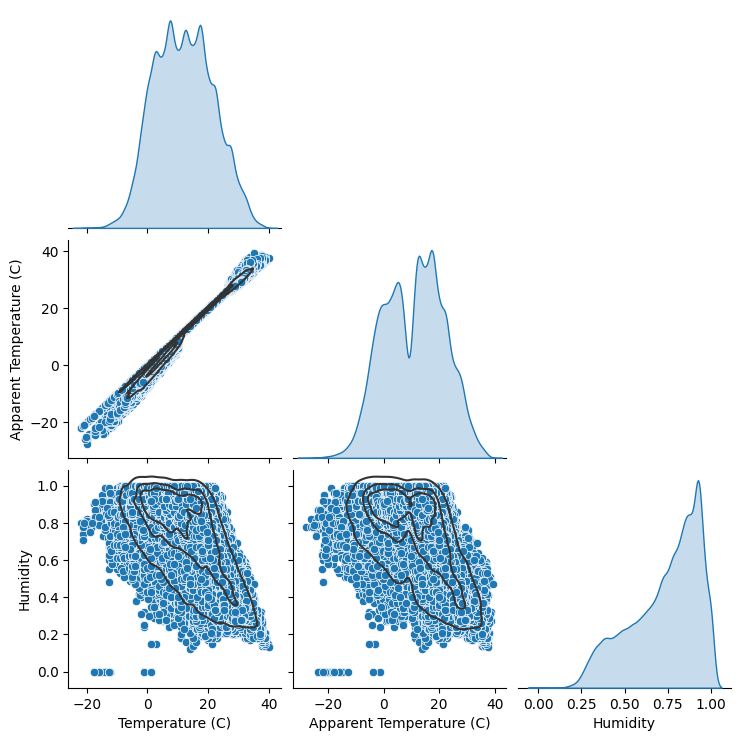

In [ ]:
plt.figure()
histo = sns.pairplot(df, vars=['Temperature (C)', 'Apparent Temperature (C)', 'Humidity'],
             corner=True, diag_kind='kde')
histo.map_lower(sns.kdeplot, levels=4, color=".2")

## 3-2: LS & RLS

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [ ]:
np.random.seed(69)
df_train = df.sample(frac=0.995)
df_test = df[~ df.isin(df_train)].dropna()

In [ ]:
scaler = StandardScaler()

### 3-2-1: LS

In [ ]:
class LinearRegressionLS:
    def __init__(self):
        self.coef = None

    def fit(self,x,y):
        x = np.column_stack((np.ones(len(x)),x))
        self.coef = np.linalg.inv(np.dot(x.T,x)).dot(x.T).dot(y)

    def predict(self,x):
        x = np.column_stack((np.ones(len(x)),x))
        return np.dot(x,self.coef)

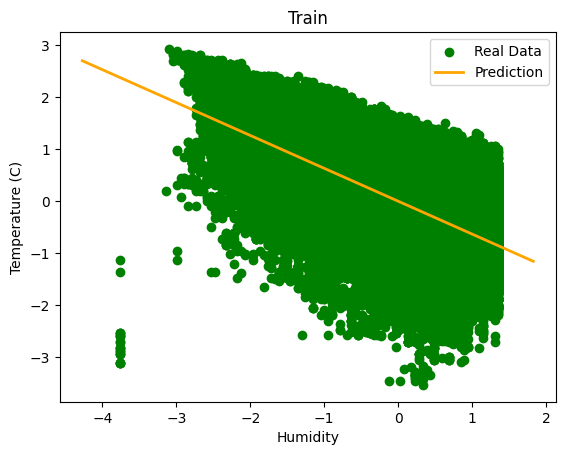

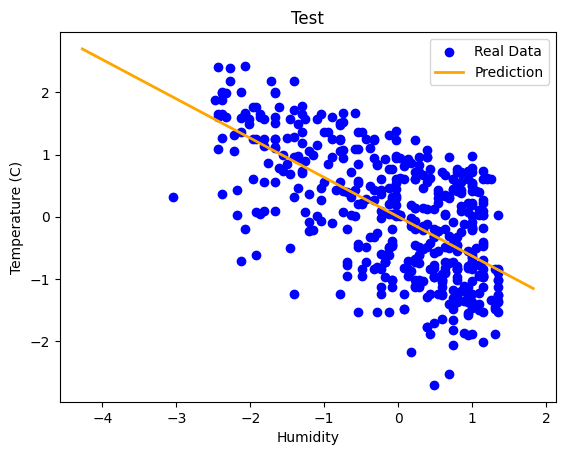

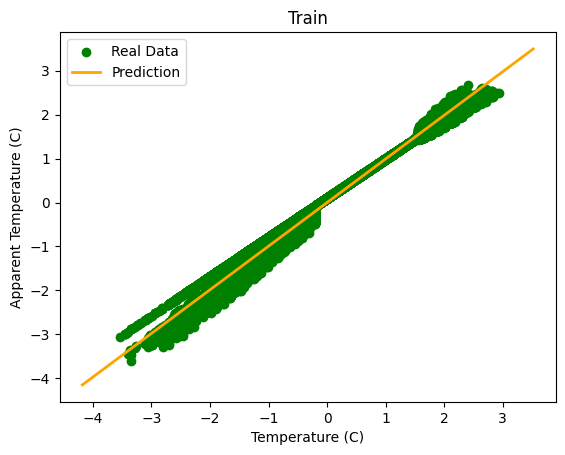

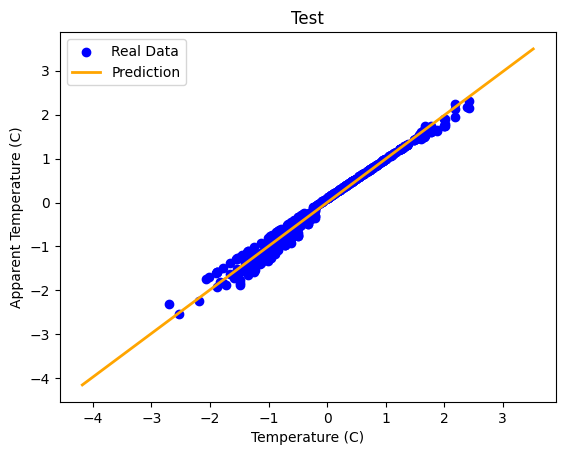

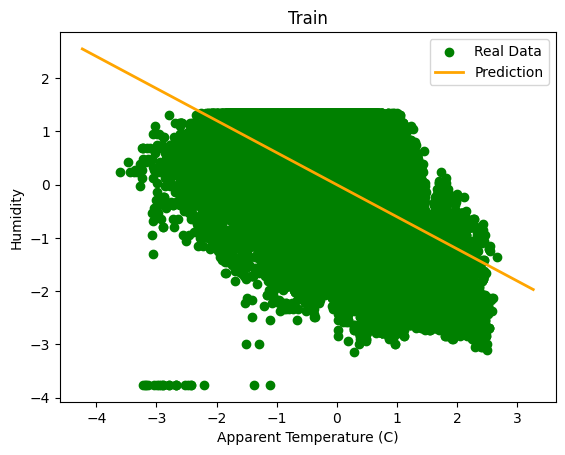

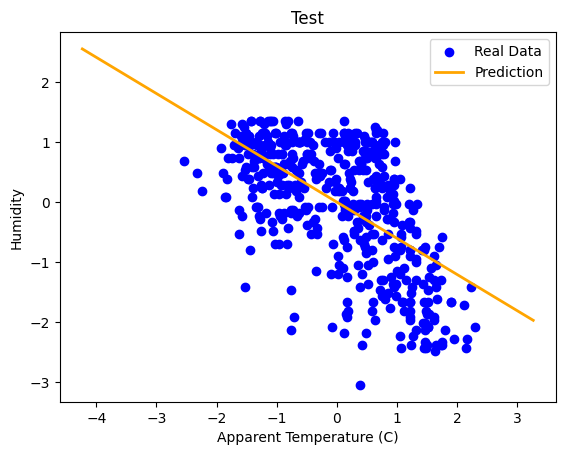

In [ ]:
vars = ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity']
ls_models = dict()
metrices = dict()
for i,v in enumerate(vars):

    # Input of model
    input = df_train[vars[i-1]].values
    output = df_train[v].values
    input_test = df_test[vars[i-1]].values
    output_test = df_test[v].values
    # Nomalizing values
    input = scaler.fit_transform(input.reshape(-1,1))
    input_test = scaler.transform(input_test.reshape(-1,1))
    output  = scaler.fit_transform(output.reshape(-1,1))
    output_test = scaler.transform(output_test.reshape(-1,1))
    # continus variable
    in_range = np.max(input) - np.min(input)
    t = np.arange(
        np.min(input)-0.1*in_range,
        np.max(input)+0.1*in_range,
        0.1
    )
    # Model fitting
    ls = LinearRegressionLS()
    ls.fit(input,output)
    ls_models[v] = ls # Save all LS models
    hat = ls.predict(t)
    # Plot Train
    plt.figure()
    plt.scatter(input, output, c='green', label='Real Data')
    plt.plot(t,hat, c='orange',linewidth=2, label='Prediction')
    plt.title('Train')
    plt.ylabel(v)
    plt.xlabel(vars[i-1])
    plt.legend()
    # Plot Test
    plt.figure()
    plt.scatter(input_test, output_test, c='blue', label='Real Data')
    plt.plot(t,hat, c='orange',linewidth=2, label='Prediction')
    plt.title('Test')
    plt.ylabel(v)
    plt.xlabel(vars[i-1])
    plt.legend()
    # Matrices
    mse = mean_squared_error(ls.predict(input),output)
    mse_test = mean_squared_error(ls.predict(input_test),output_test)
    mae = mean_absolute_error(ls.predict(input),output)
    mae_test = mean_absolute_error(ls.predict(input_test),output_test)
    metrices[v] = {'MSE Train':mse, 'MSE Test':mse_test, 'MAE Train':mae, 'MAE Test':mae_test}

pd.DataFrame(metrices).T.to_excel('ls.xlsx')

AT with T&H

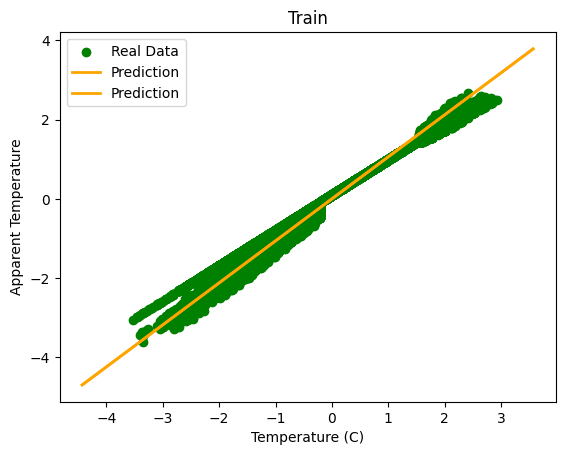

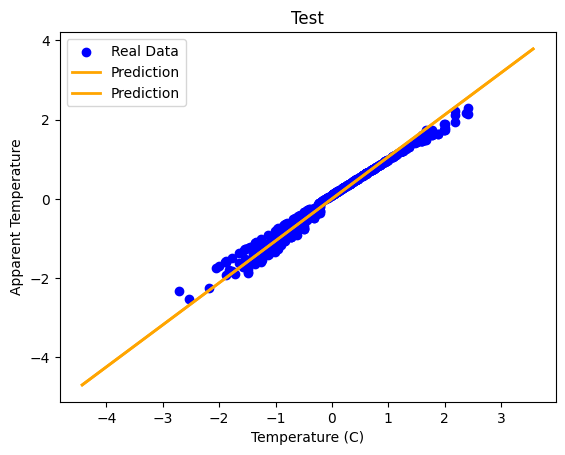

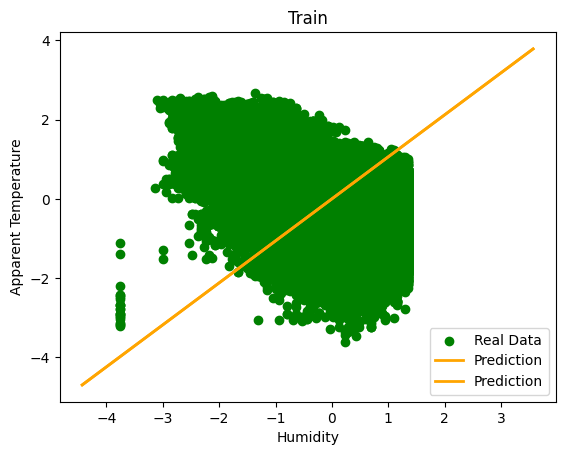

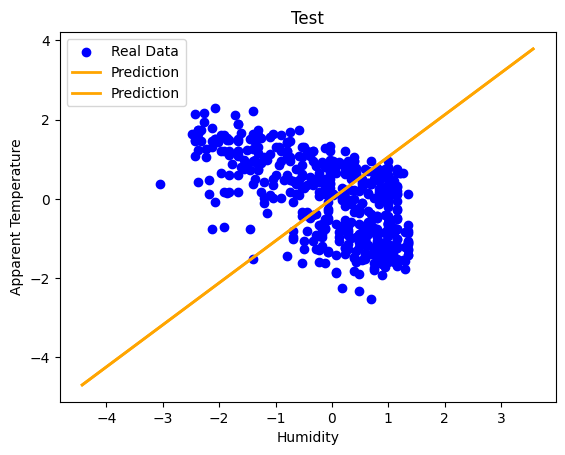

In [ ]:
in_vars = ['Temperature (C)', 'Humidity']
input = df_train[['Temperature (C)', 'Humidity']].values
output = df_train[ 'Apparent Temperature (C)'].values
input_test = df_test[['Temperature (C)', 'Humidity']].values
output_test = df_test['Apparent Temperature (C)'].values
# Nomalizing values
input = scaler.fit_transform(input)
input_test = scaler.transform(input_test)
output  = scaler.fit_transform(output.reshape(-1,1))
output_test = scaler.transform(output_test.reshape(-1,1))
# New input
in_range = np.max(input) - np.min(input)
t = np.arange(
    np.min(input)-0.1*in_range,
    np.max(input)+0.1*in_range,
    0.1
)
t = np.column_stack((t,t))
# Model fitting
ls = LinearRegressionLS()
ls.fit(input,output)
ls_models[v] = ls # Save all LS models
hat = ls.predict(t)
for i in range(2):

    # Plot Train
    plt.figure()
    plt.scatter(input[:,i], output, c='green', label='Real Data')
    plt.plot(t,hat, c='orange',linewidth=2, label='Prediction')
    plt.title('Train')
    plt.ylabel('Apparent Temperature')
    plt.xlabel(in_vars[i])
    plt.legend()
    # Plot Test
    plt.figure()
    plt.scatter(input_test[:,i], output_test, c='blue', label='Real Data')
    plt.plot(t,hat, c='orange',linewidth=2, label='Prediction')
    plt.title('Test')
    plt.ylabel('Apparent Temperature')
    plt.xlabel(in_vars[i])
    plt.legend()
# Matrices
mse = mean_squared_error(ls.predict(input),output)
mse_test = mean_squared_error(ls.predict(input_test),output_test)
mae = mean_absolute_error(ls.predict(input),output)
mae_test = mean_absolute_error(ls.predict(input_test),output_test)
metrices = {'MSE Train':mse, 'MSE Test':mse_test, 'MAE Train':mae, 'MAE Test':mae_test}

In [ ]:
metrices

{'MSE Train': 0.013643403825204197,
 'MSE Test': 0.014259104147904506,
 'MAE Train': 0.08831030708482074,
 'MAE Test': 0.08980733848199939}

### 3-2-2: RLS

In [ ]:
class RecursiveLeastSquares:
    def __init__(self, n_features, forgetting_factor=0.99):
        self.n_features = n_features
        self.forgetting_factor = forgetting_factor
        self.theta = np.zeros((n_features, 1))  # Initialize model parameters
        self.P = np.eye(n_features)  # Initialize covariance matrix

    def fit(self, X, y):
        errors = []
        for i in range(len(X)):
            x_i = X[i].reshape(-1, 1)
            y_i = y[i]

            # Predict
            y_pred = np.dot(x_i.T, self.theta)

            # Update
            error = y_i - y_pred
            errors.append(error)
            K = np.dot(self.P, x_i) / (self.forgetting_factor + np.dot(np.dot(x_i.T, self.P), x_i))
            self.theta = self.theta + np.dot(K, error)
            self.P = (1 / self.forgetting_factor) * (self.P - np.dot(K, np.dot(x_i.T, self.P)))

        return errors

    def predict(self, X):
        return np.dot(X, self.theta)


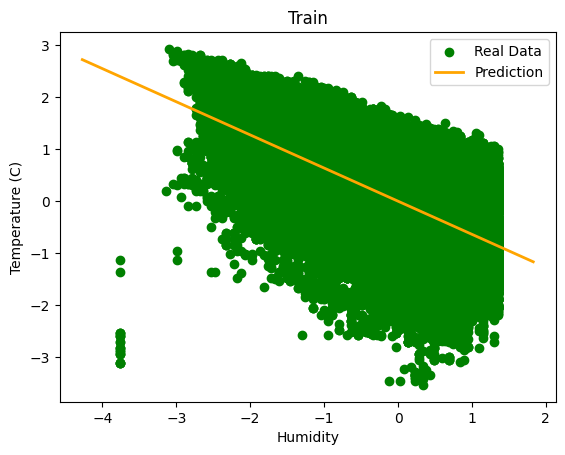

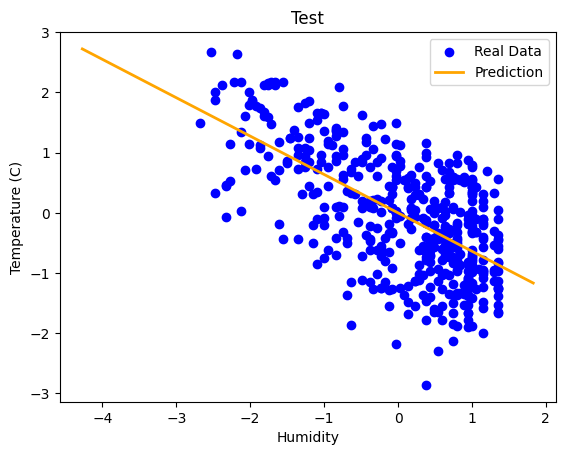

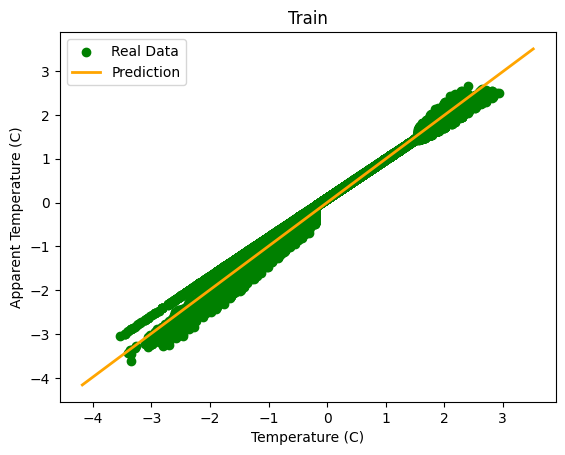

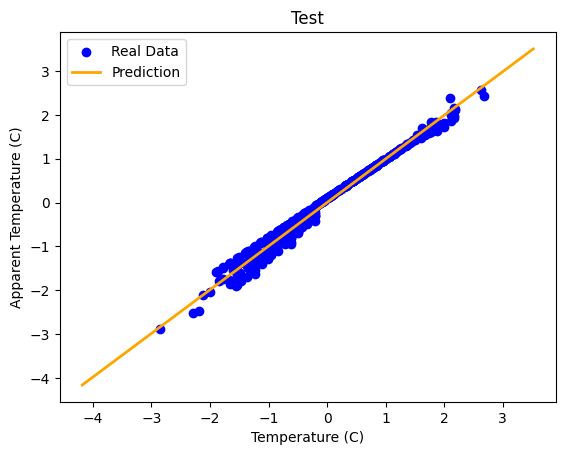

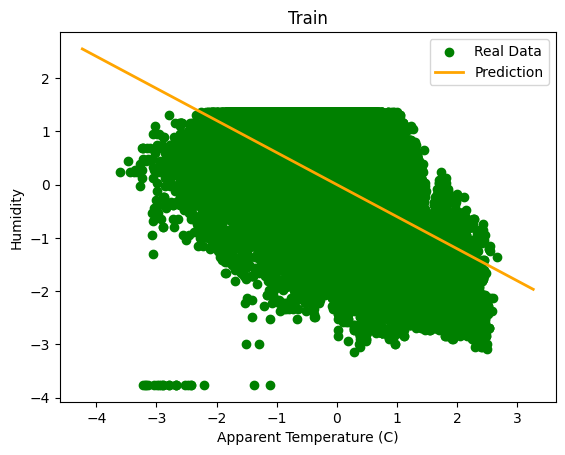

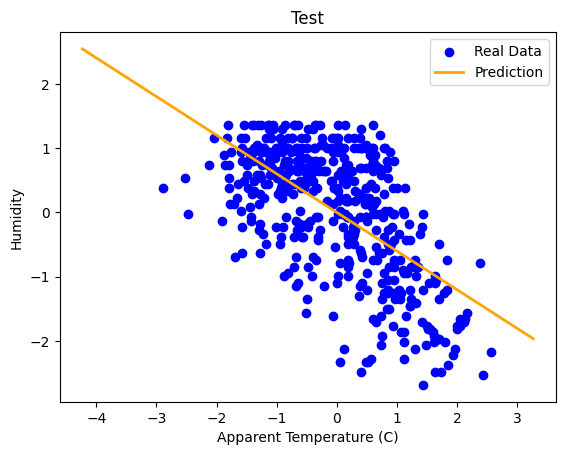

In [ ]:
vars = ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity']
rls_models = dict()
metrices = dict()
for i,v in enumerate(vars):

    # Input of model
    input = df_train[vars[i-1]].values
    output = df_train[v].values
    input_test = df_test[vars[i-1]].values
    output_test = df_test[v].values
    # Nomalizing values
    input = scaler.fit_transform(input.reshape(-1,1))
    input_test = scaler.transform(input_test.reshape(-1,1))
    output  = scaler.fit_transform(output.reshape(-1,1))
    output_test = scaler.transform(output_test.reshape(-1,1))
    # continus variable
    in_range = np.max(input) - np.min(input)
    t = np.arange(
        np.min(input)-0.1*in_range,
        np.max(input)+0.1*in_range,
        0.1
    )
    # Model fitting
    rls = RecursiveLeastSquares(n_features=1,forgetting_factor=0.999)
    rls.fit(input,output)
    rls_models[v] = wls # Save all LS models
    hat = rls.predict(t.reshape(-1,1))
    # Plot Train
    plt.figure()
    plt.scatter(input, output, c='green', label='Real Data')
    plt.plot(t,hat, c='orange',linewidth=2, label='Prediction')
    plt.title('Train')
    plt.ylabel(v)
    plt.xlabel(vars[i-1])
    plt.legend()
    # Plot Test
    plt.figure()
    plt.scatter(input_test, output_test, c='blue', label='Real Data')
    plt.plot(t,hat, c='orange',linewidth=2, label='Prediction')
    plt.title('Test')
    plt.ylabel(v)
    plt.xlabel(vars[i-1])
    plt.legend()
    # Matrices
    mse = mean_squared_error(rls.predict(input),output)
    mse_test = mean_squared_error(rls.predict(input_test),output_test)
    mae = mean_absolute_error(rls.predict(input),output)
    mae_test = mean_absolute_error(rls.predict(input_test),output_test)
    metrices[v] = {'MSE Train':mse, 'MSE Test':mse_test, 'MAE Train':mae, 'MAE Test':mae_test}

pd.DataFrame(metrices).T.to_excel('rls.xlsx')

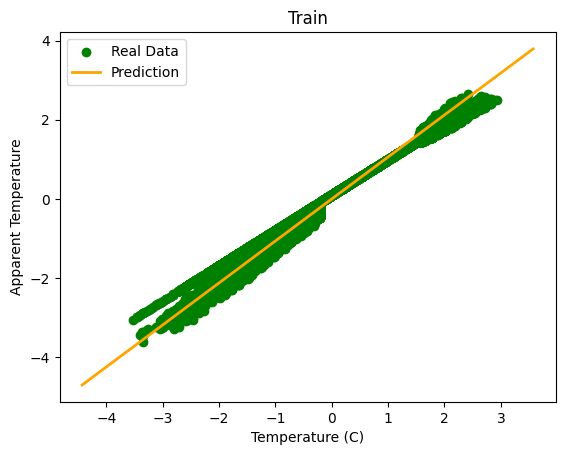

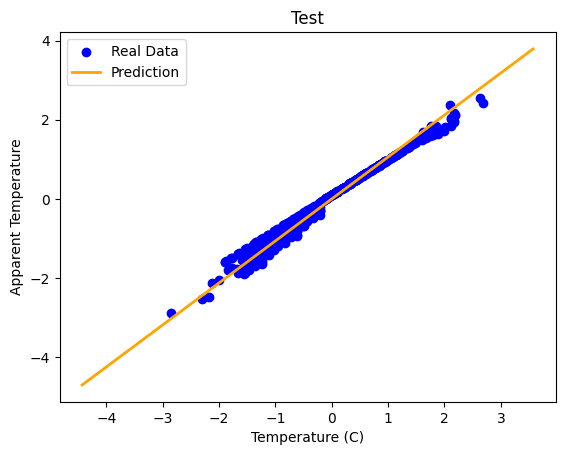

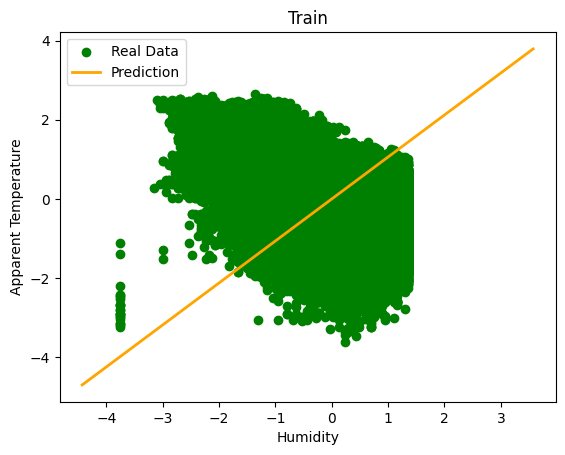

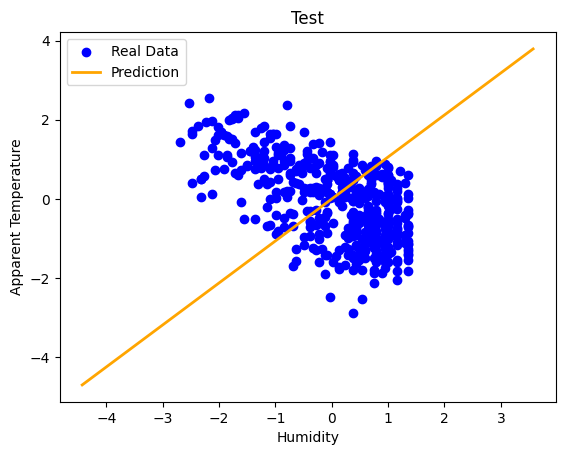

In [ ]:
in_vars = ['Temperature (C)', 'Humidity']
input = df_train[['Temperature (C)', 'Humidity']].values
output = df_train[ 'Apparent Temperature (C)'].values
input_test = df_test[['Temperature (C)', 'Humidity']].values
output_test = df_test['Apparent Temperature (C)'].values
# Nomalizing values
input = scaler.fit_transform(input)
input_test = scaler.transform(input_test)
output  = scaler.fit_transform(output.reshape(-1,1))
output_test = scaler.transform(output_test.reshape(-1,1))
# New input
in_range = np.max(input) - np.min(input)
t = np.arange(
    np.min(input)-0.1*in_range,
    np.max(input)+0.1*in_range,
    0.1
)
t = np.column_stack((t,t))
# Model fitting
rls = RecursiveLeastSquares(n_features=2,forgetting_factor=0.9999)
rls.fit(input,output)
hat = rls.predict(t)
for i in range(2):

    # Plot Train
    plt.figure()
    plt.scatter(input[:,i], output, c='green', label='Real Data')
    plt.plot(t[:,i],hat, c='orange',linewidth=2, label='Prediction')
    plt.title('Train')
    plt.ylabel('Apparent Temperature')
    plt.xlabel(in_vars[i])
    plt.legend()
    # Plot Test
    plt.figure()
    plt.scatter(input_test[:,i], output_test, c='blue', label='Real Data')
    plt.plot(t[:,i],hat, c='orange',linewidth=2, label='Prediction')
    plt.title('Test')
    plt.ylabel('Apparent Temperature')
    plt.xlabel(in_vars[i])
    plt.legend()
# Matrices
mse = mean_squared_error(rls.predict(input),output)
mse_test = mean_squared_error(rls.predict(input_test),output_test)
mae = mean_absolute_error(rls.predict(input),output)
mae_test = mean_absolute_error(rls.predict(input_test),output_test)
metrices = {'MSE Train':mse, 'MSE Test':mse_test, 'MAE Train':mae, 'MAE Test':mae_test}

In [ ]:
metrices

{'MSE Train': 0.013641140078808223,
 'MSE Test': 0.014379617933940594,
 'MAE Train': 0.08830452214956676,
 'MAE Test': 0.09055958079850851}

## 3-3: Weighted Least Squares

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [12]:
df3 = df.sample(frac=1)[['Temperature (C)', 'Apparent Temperature (C)', 'Humidity']]
np.random.seed(85)
df_train = df3.sample(frac=0.995)
df_test = df3[~ df.isin(df_train)].dropna()

In [13]:
import statsmodels.api as sm

class WeightedLeastSquares:
    def __init__(self):
        self.weights = None
        self.model = None

    def fit(self, X, y):
        # Calculate the weights as 1/var(y)
        self.weights = 1 / np.var(y)

        # Fit the WLS model
        X_with_intercept = sm.add_constant(X)  # Add constant term for intercept
        self.model = sm.WLS(y, X_with_intercept, weights=self.weights)
        self.results = self.model.fit()

    def predict(self, X):
        # Add constant term for intercept
        X_with_intercept = sm.add_constant(X)
        return self.results.predict(X_with_intercept)



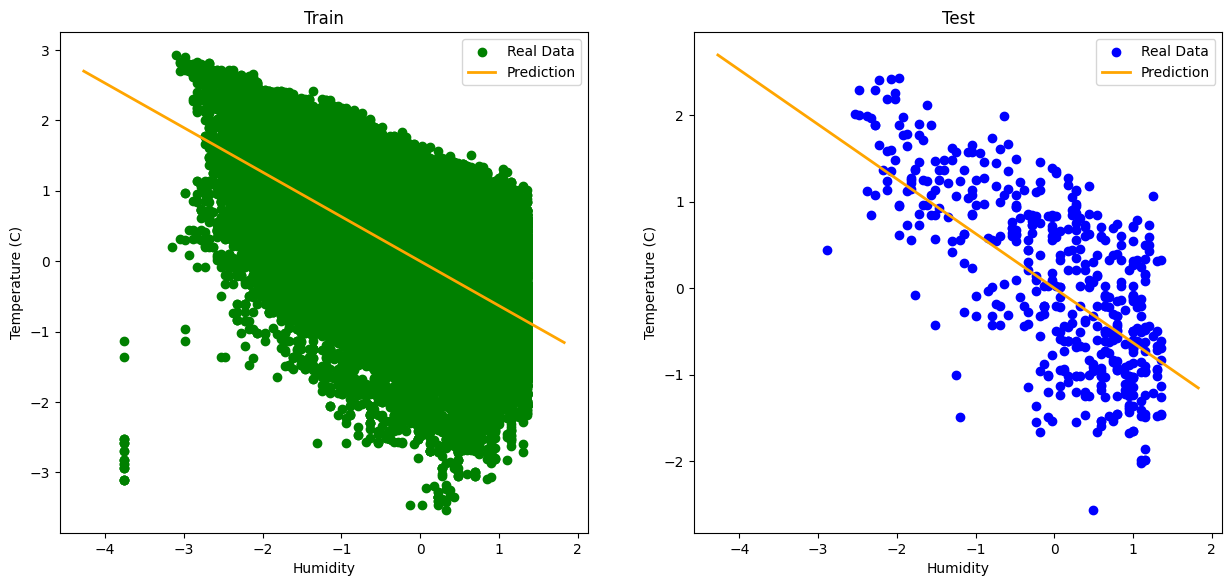

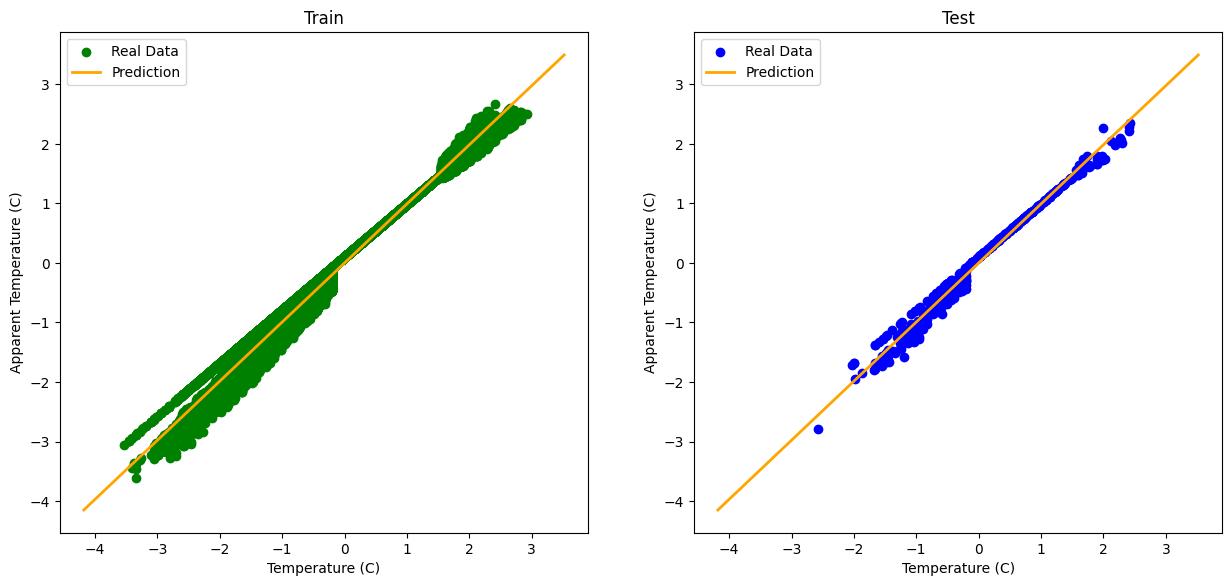

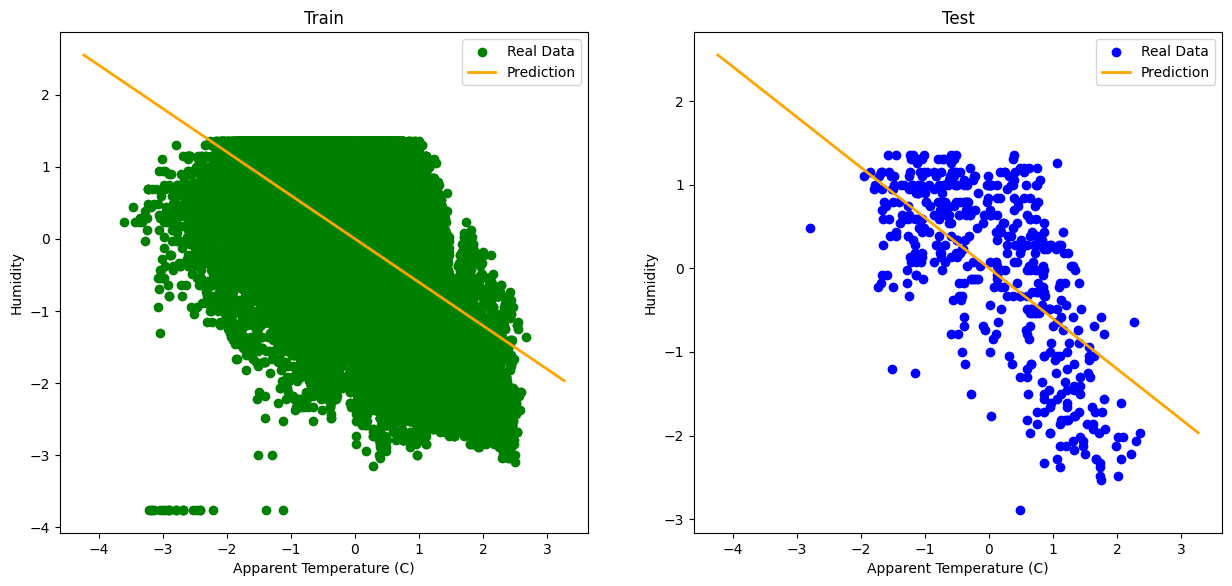

In [14]:
vars = ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity']
wls_models = dict()
metrices = dict()
for i,v in enumerate(vars):

    # Input of model
    input = df_train[vars[i-1]].values
    output = df_train[v].values
    input_test = df_test[vars[i-1]].values
    output_test = df_test[v].values
    # Nomalizing values
    input = scaler.fit_transform(input.reshape(-1,1))
    input_test = scaler.transform(input_test.reshape(-1,1))
    output  = scaler.fit_transform(output.reshape(-1,1))
    output_test = scaler.transform(output_test.reshape(-1,1))
    # continus variable
    in_range = np.max(input) - np.min(input)
    t = np.arange(
        np.min(input)-0.1*in_range,
        np.max(input)+0.1*in_range,
        0.1
    )
    # Model fitting
    wls = WeightedLeastSquares()
    wls.fit(input,output)
    wls_models[v] = wls # Save all LS models
    hat = wls.predict(t.reshape(-1,1))
    # Plot Train
    plt.figure(figsize=(15,6.5))
    plt.subplot(1,2,1)
    plt.scatter(input, output, c='green', label='Real Data')
    plt.plot(t,hat, c='orange',linewidth=2, label='Prediction')
    plt.title('Train')
    plt.ylabel(v)
    plt.xlabel(vars[i-1])
    plt.legend()
    # Plot Test
    plt.subplot(1,2,2)
    plt.scatter(input_test, output_test, c='blue', label='Real Data')
    plt.plot(t,hat, c='orange',linewidth=2, label='Prediction')
    plt.title('Test')
    plt.ylabel(v)
    plt.xlabel(vars[i-1])
    plt.legend()
    # Matrices
    mse = mean_squared_error(wls.predict(input),output)
    mse_test = mean_squared_error(wls.predict(input_test),output_test)
    mae = mean_absolute_error(wls.predict(input),output)
    mae_test = mean_absolute_error(wls.predict(input_test),output_test)
    metrices[v] = {'MSE Train':mse, 'MSE Test':mse_test, 'MAE Train':mae, 'MAE Test':mae_test}

pd.DataFrame(metrices).T.to_excel('wls.xlsx')

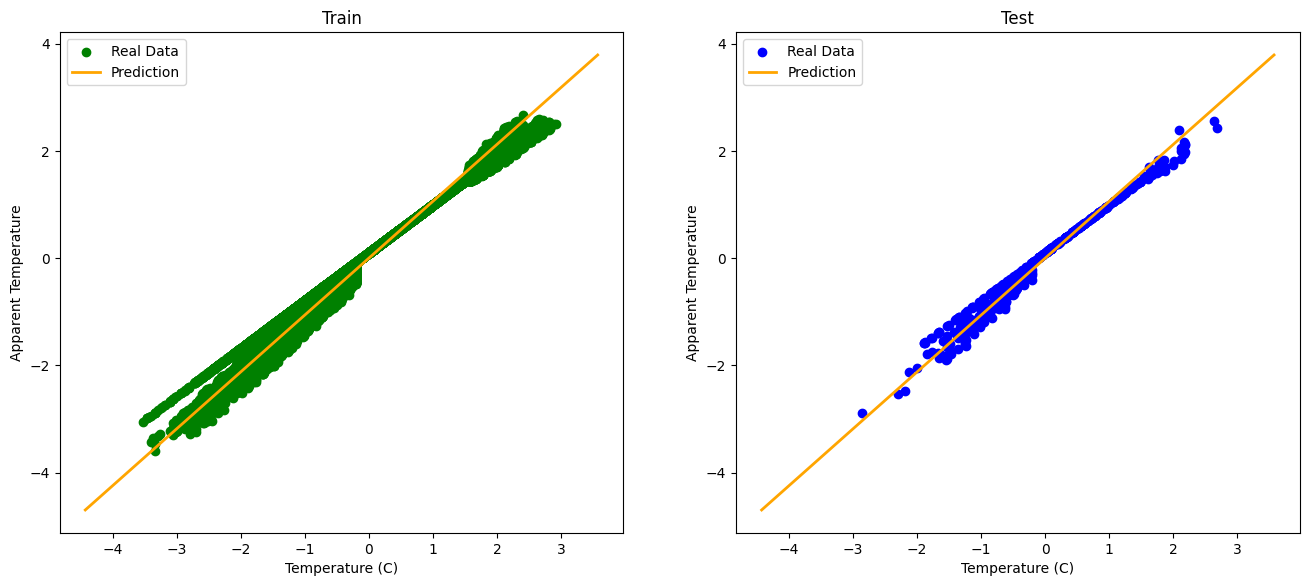

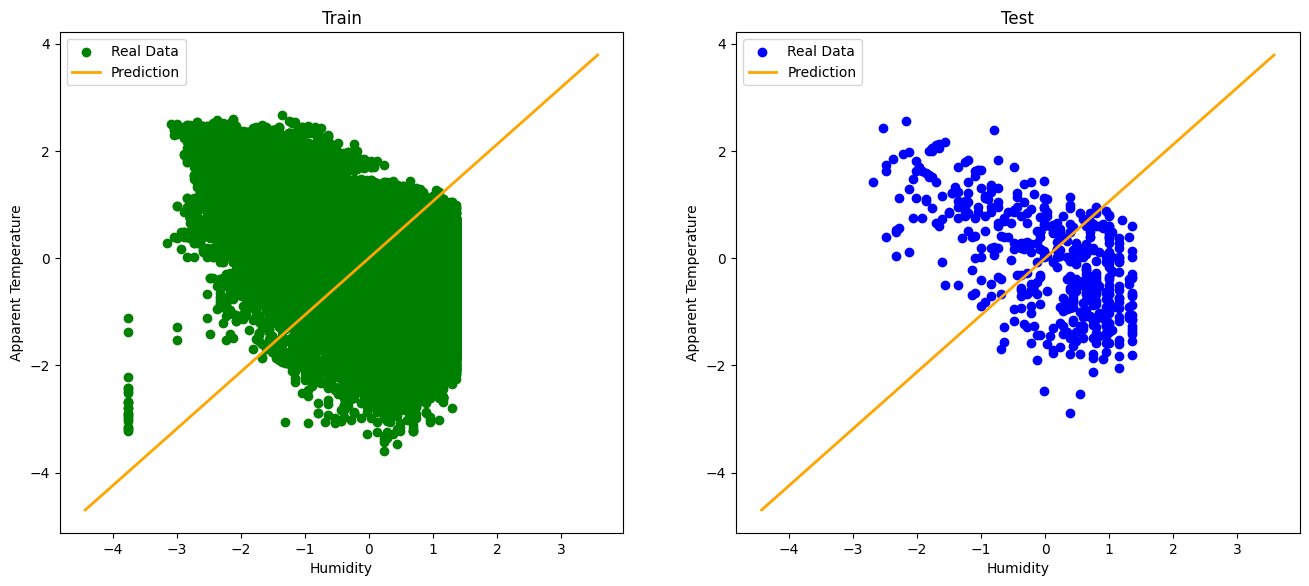

In [ ]:
in_vars = ['Temperature (C)', 'Humidity']
input = df_train[['Temperature (C)', 'Humidity']].values
output = df_train[ 'Apparent Temperature (C)'].values
input_test = df_test[['Temperature (C)', 'Humidity']].values
output_test = df_test['Apparent Temperature (C)'].values
# Nomalizing values
input = scaler.fit_transform(input)
input_test = scaler.transform(input_test)
output  = scaler.fit_transform(output.reshape(-1,1))
output_test = scaler.transform(output_test.reshape(-1,1))
# New input
in_range = np.max(input) - np.min(input)
t = np.arange(
    np.min(input)-0.1*in_range,
    np.max(input)+0.1*in_range,
    0.1
)
t = np.column_stack((t,t))
# Model fitting
# wls = WeightedLeastSquares()
# wls.fit(input,output)
# # wls_models[v] = %who_lsls # Save all LS models
# hat = wls.predict(t)
for i in range(2):

    # Plot Train
    plt.figure(figsize=(16,6.5))
    plt.subplot(1,2,1)
    plt.scatter(input[:,i], output, c='green', label='Real Data')
    plt.plot(t[:,i],hat, c='orange',linewidth=2, label='Prediction')
    plt.title('Train')
    plt.ylabel('Apparent Temperature')
    plt.xlabel(in_vars[i])
    plt.legend()
    # Plot Test
    plt.subplot(1,2,2)
    plt.scatter(input_test[:,i], output_test, c='blue', label='Real Data')
    plt.plot(t[:,i],hat, c='orange',linewidth=2, label='Prediction')
    plt.title('Test')
    plt.ylabel('Apparent Temperature')
    plt.xlabel(in_vars[i])
    plt.legend()
# Matrices
mse = mean_squared_error(wls.predict(input),output)
mse_test = mean_squared_error(wls.predict(input_test),output_test)
mae = mean_absolute_error(wls.predict(input),output)
mae_test = mean_absolute_error(wls.predict(input_test),output_test)
metrices = {'MSE Train':mse, 'MSE Test':mse_test, 'MAE Train':mae, 'MAE Test':mae_test}

In [ ]:
metrices

{'MSE Train': 0.013641139685912781,
 'MSE Test': 0.014379709500682958,
 'MAE Train': 0.08830497877915316,
 'MAE Test': 0.09056002327396476}